# Guns and Crimes
<i>FGV - 2016</i>

## Alunos
<ul>  
    <li>
        Eduardo Cesar 
    </li>
    <li>
        Felipe Antunes 
    </li>
</ul>
<hr>

<i> Importando bibliotecas </i>

In [1]:
import os
import sys
import time
import datetime
import numpy as np
import pandas as pd
from matplotlib import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline



/usr/local/lib/python3.4/dist-packages/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "


<i> Dados disponíveis no repositório <a href="https://github.com/jldbc/gunsandcrime">gunsandcrime</a></i>

In [2]:
datafile = "gun_crime_data.csv"

## Explorando o dataset

In [3]:
df_csv = pd.read_csv(datafile)
df = df_csv.dropna() # Retirando dados com valores NaN
df = df.sort_values(['year']) # Ordenando crescentemente por ano, para melhor visualização das séries temporais
df_csv.head()

,year,pop,ampct,metpct,unrate,prison,totemployed,employ,military,rpci,...,mc_noburg,gunsamm,amrmms,amhms,phg,pgun,mc_noassault,r1524,r2544,r4564
0,2013.0,316500.0,0.129,0.81,7.4,4077.436,136394.0,0.430945,4.739336,30518.0,...,1290.995,420577.0,2200000.0,925238.0,23.91000,29.14000,977.5071,12.16,20.0,26.76
1,2012.0,314110.0,0.128,0.81,8.1,4065.240,134098.0,0.426914,4.937761,29161.0,...,1371.663,392122.0,1900000.0,915060.0,22.75591,33.77953,1100.7190,12.16,20.0,26.76
2,2011.0,311720.0,0.127,0.81,8.9,4139.755,131843.0,0.422953,5.078275,29005.0,...,1400.010,378380.0,1700000.0,1000000.0,21.18000,33.89000,1138.5090,12.16,20.0,26.76
3,2010.0,310232.8,0.127,0.81,9.6,4177.352,130269.0,0.419907,5.163864,28838.0,...,1475.788,404150.0,1800000.0,1100000.0,19.54211,31.39820,1162.0530,12.16,20.0,26.76
4,2009.0,307006.5,0.126,0.81,9.3,4232.373,131220.0,0.427418,5.182301,29274.0,...,1569.885,414150.0,1800000.0,954901.0,20.78000,39.66000,1249.1490,12.40,22.0,26.20


In [5]:
df_csv.describe()

/home/eduardocesar/.local/lib/python3.5/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,year,pop,ampct,metpct,unrate,prison,totemployed,employ,military,rpci,...,mc_noburg,gunsamm,amrmms,amhms,phg,pgun,mc_noassault,r1524,r2544,r4564
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,...,34.000000,15.000000,1.500000e+01,1.500000e+01,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,1996.500000,270009.473529,0.123407,0.774391,6.464706,3187.431294,117725.882353,0.434717,6.619693,26996.470588,...,1878.995559,466437.933333,1.573333e+06,1.011130e+06,22.039521,38.798810,1744.931444,15.062189,28.782477,22.050905
std,9.958246,28490.133856,0.003667,0.026215,1.646094,993.798203,16290.615050,0.023482,1.874357,3247.483989,...,350.543655,71868.117600,2.631313e+05,1.018971e+05,3.326157,9.115436,566.228123,1.889766,4.041572,2.936961
min,1980.000000,226549.000000,0.116950,0.737377,4.000000,1262.872000,89684.000000,0.386197,4.731749,21160.000000,...,1290.995000,378380.000000,1.200000e+06,9.133610e+05,14.116490,16.970000,977.507100,12.160000,20.000000,18.885410
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2013.000000,316500.000000,0.129000,0.810000,9.700000,4232.373000,137935.000000,0.473943,9.267693,30943.000000,...,2624.043000,607971.000000,2.200000e+06,1.200000e+06,31.320000,61.510000,2732.196000,19.342620,32.995590,26.760000


## Imagens extraídas do Weka

 <div style="display:inline-block">
     <img src="img1.png" alt="Imagem 1" width="700"/> 
     <img src="img2.png" alt="Imagem 1" width="700"/> 
     <img src="img3.png" alt="Imagem 1" width="700"/> 
     <img src="img4.png" alt="Imagem 1" width="700"/> 
     <img src="img5.png" alt="Imagem 1" width="700"/>
     <img src="img6.png" alt="Imagem 1" width="700"/> 
 </div>

## Visão geral dos principais índices de armamento e criminalidade do conjunto de dados

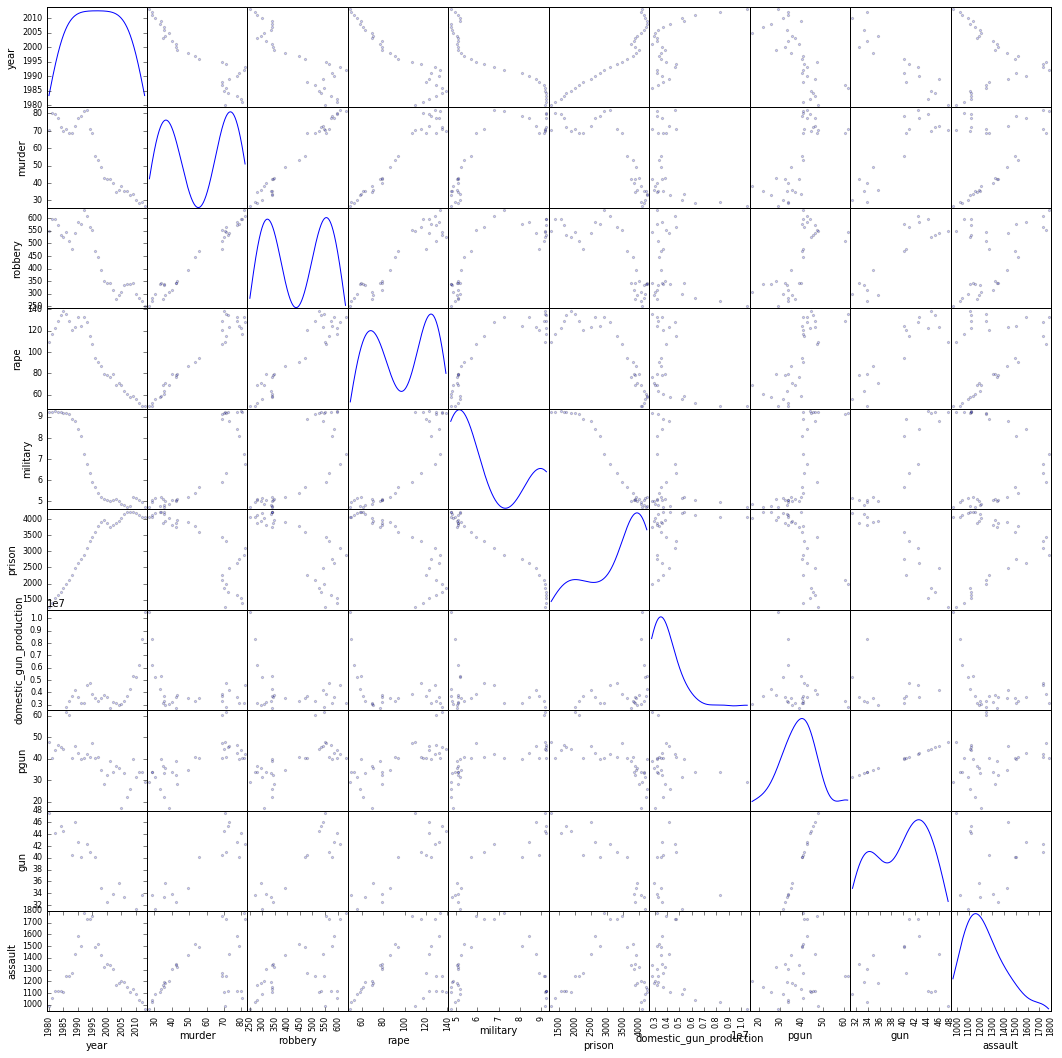

In [8]:
from pandas.tools.plotting import scatter_matrix
my_features = ['year', 'murder', 'robbery', 'rape', 'military', 'prison', 'domestic_gun_production', 'pgun','gun', 'assault']
fig = scatter_matrix(df_csv[my_features], alpha=0.2, figsize=(18, 18), diagonal='kde')

## Séries temporais dos crimes 
   Os crimes, em geral, diminuiram consideravelmente ao longo dos anos

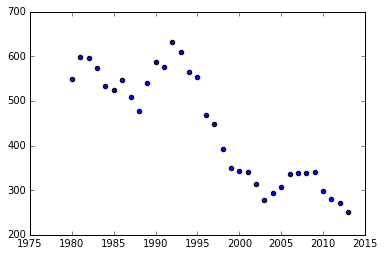

In [13]:
plt.scatter(df_csv['year'], df_csv['robbery']) #Série de roubos

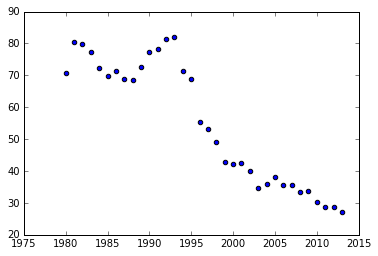

In [14]:
plt.scatter(df_csv['year'], df_csv['murder']) #Série de assassinatos

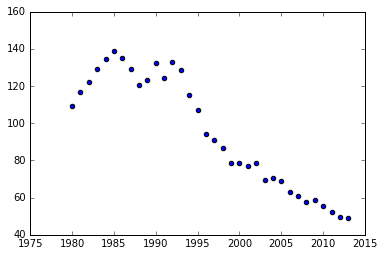

In [15]:
plt.scatter(df_csv['year'], df_csv['rape']) #Série de estupros

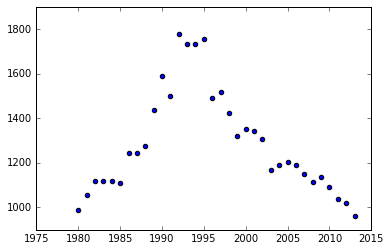

In [16]:
plt.scatter(df_csv['year'], df_csv['assault']) #Série de assaltos

## Dados de armas e crimes
Alguns crimes pareceram aumentar com o aumento das armas, outros tiveram compartamentos inconclusivos

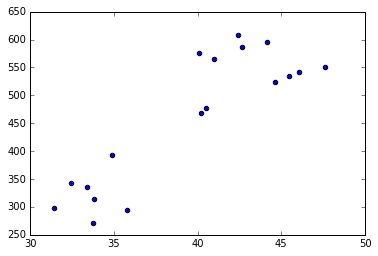

In [17]:
plt.scatter(df_csv['gun'], df_csv['robbery']) #Roubos por armas

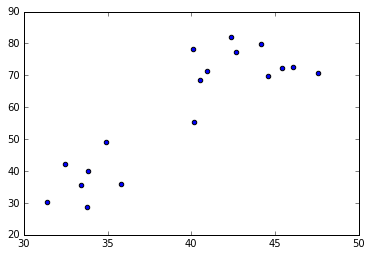

In [18]:
plt.scatter(df_csv['gun'], df_csv['murder']) #Assasinatos por armas

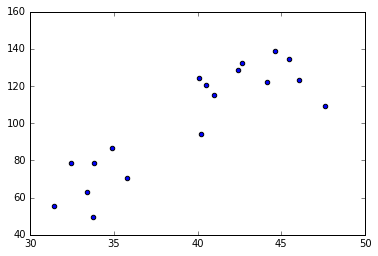

In [19]:
plt.scatter(df_csv['gun'], df_csv['rape']) #Esturpos por armas

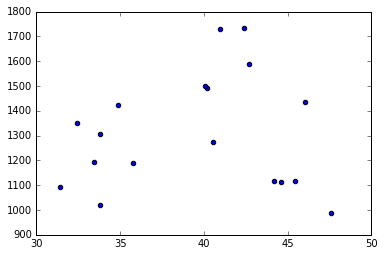

In [20]:
plt.scatter(df_csv['gun'], df_csv['assault']) #Assaltos por armas

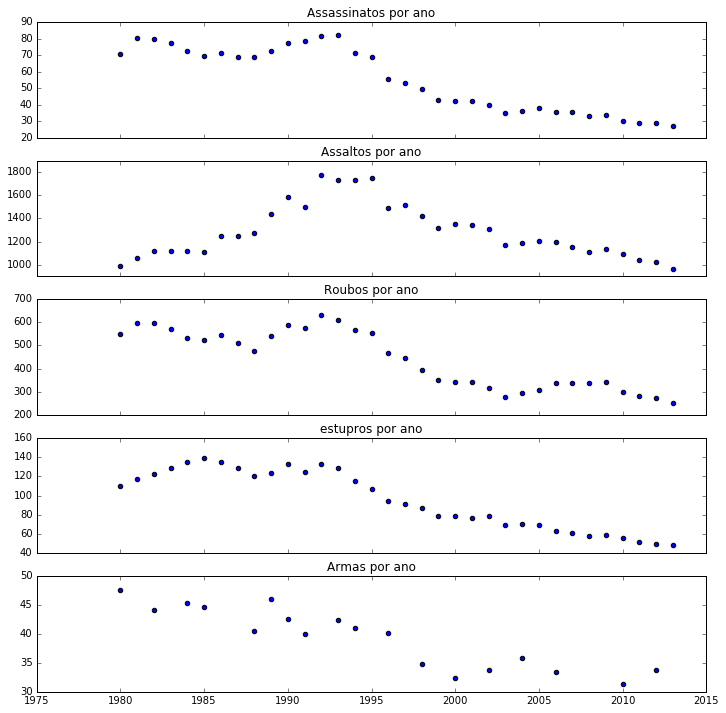

In [6]:


f, ax = plt.subplots(nrows=5, ncols=1, figsize=(12,12), sharex=True, sharey=False)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
ax[0].scatter(df_csv['year'], df_csv['murder'])
ax[0].set_title('Assassinatos por ano')
ax[1].scatter(df_csv['year'], df_csv['assault'])
ax[1].set_title('Assaltos por ano')
ax[2].scatter(df_csv['year'],df_csv['robbery'])
ax[2].set_title('Roubos por ano')
ax[3].scatter(df_csv['year'], df_csv['rape'])
ax[3].set_title('estupros por ano')
ax[4].scatter(df_csv['year'], df_csv['gun'])
ax[4].set_title('Armas por ano')
#f.subplots_adjust(hspace=0)
plt.show()

Observando as séries temporais, é possivel enxergar uma tendencia de queda no número de armas e uma concomitante queda nos 4 tipos de crime observados.

## Saúde financeira e Criminalidade
O número de crimes foi menor em anos de maior saúde financeira (maior rpci e menor desemprego)

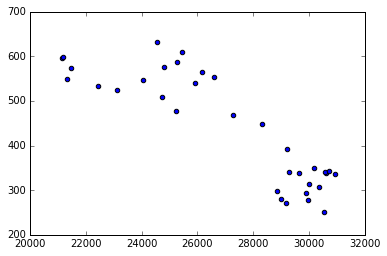

In [21]:
plt.scatter(df_csv['rpci'], df_csv['robbery']) #Roubos por renda

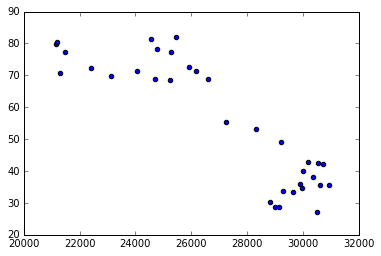

In [22]:
plt.scatter(df_csv['rpci'], df_csv['murder']) #Assassinatos por renda

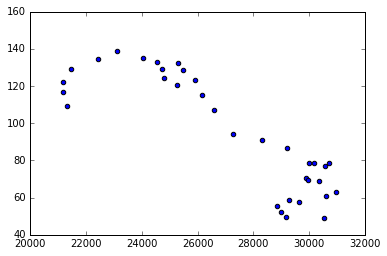

In [23]:
plt.scatter(df_csv['rpci'], df_csv['rape']) #Estupros por renda per capta


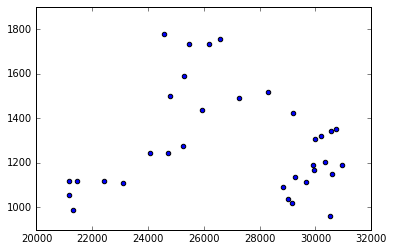

In [24]:
plt.scatter(df_csv['rpci'], df_csv['assault']) #Assaltos por renda per capta

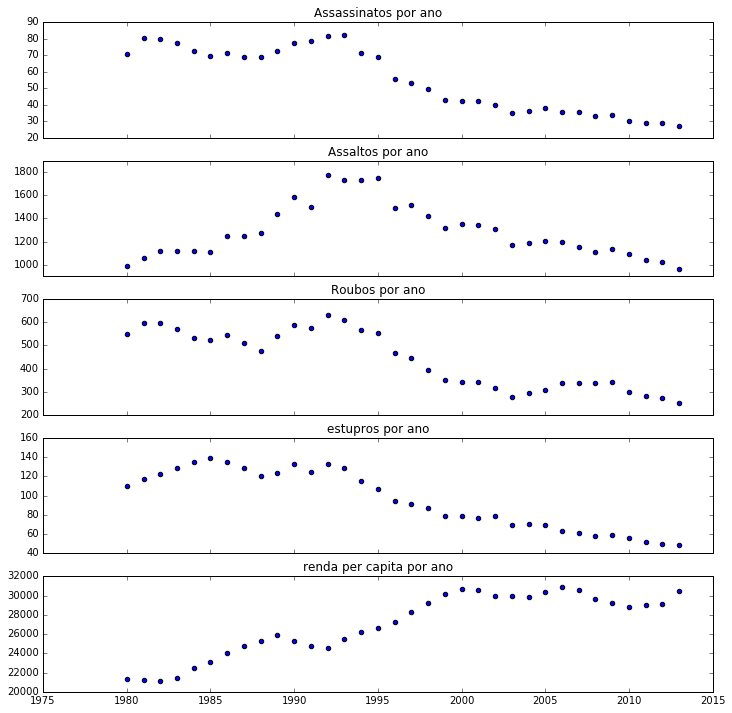

In [10]:
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(12,12), sharex=True, sharey=False)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
ax[0].scatter(df_csv['year'], df_csv['murder'])
ax[0].set_title('Assassinatos por ano')
ax[1].scatter(df_csv['year'], df_csv['assault'])
ax[1].set_title('Assaltos por ano')
ax[2].scatter(df_csv['year'],df_csv['robbery'])
ax[2].set_title('Roubos por ano')
ax[3].scatter(df_csv['year'], df_csv['rape'])
ax[3].set_title('estupros por ano')
ax[4].scatter(df_csv['year'], df_csv['rpci'])
ax[4].set_title('renda per capita por ano')
#f.subplots_adjust(hspace=0)
plt.show()

A tendencia de queda de todos os indicadores criminais se inicia depois de 1990, periodo em que a renda per capita volta a crescer. Observamos que o numero de assaltos cresce junto com a renda per capita até cerca de 1990. Porém, todos os indicadores criminais apresentam seu nivel mais baixo no periodo de renda per capita mais alta.

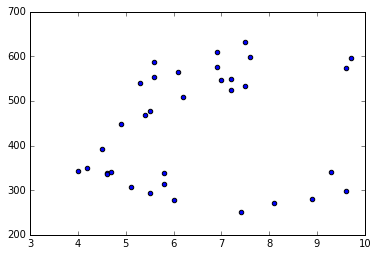

In [25]:
plt.scatter(df_csv['unrate'], df_csv['robbery']) #Roubos por armas

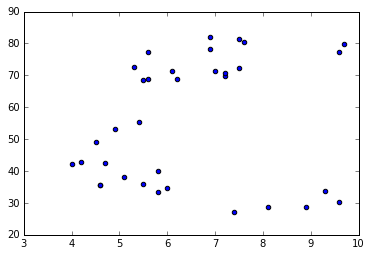

In [26]:
plt.scatter(df_csv['unrate'], df_csv['murder']) #Assassinatos por desempregos

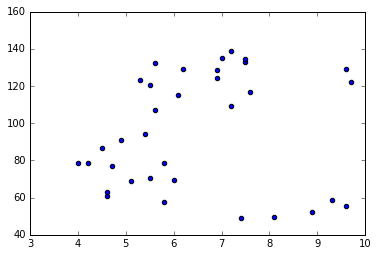

In [27]:
plt.scatter(df_csv['unrate'], df_csv['rape']) #Estupros por desempregos

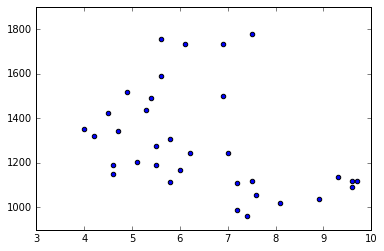

In [28]:
plt.scatter(df_csv['unrate'], df_csv['assault']) #Assaltos por desempregos

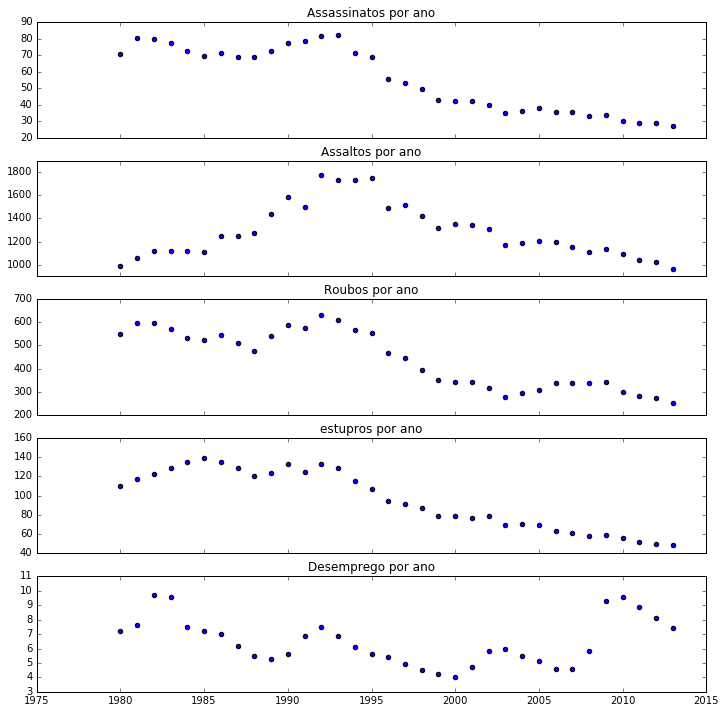

In [8]:
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(12,12), sharex=True, sharey=False)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
ax[0].scatter(df_csv['year'], df_csv['murder'])
ax[0].set_title('Assassinatos por ano')
ax[1].scatter(df_csv['year'], df_csv['assault'])
ax[1].set_title('Assaltos por ano')
ax[2].scatter(df_csv['year'],df_csv['robbery'])
ax[2].set_title('Roubos por ano')
ax[3].scatter(df_csv['year'], df_csv['rape'])
ax[3].set_title('estupros por ano')
ax[4].scatter(df_csv['year'], df_csv['unrate'])
ax[4].set_title('Desemprego por ano')
#f.subplots_adjust(hspace=0)
plt.show()

Podemos observar que a taxa de desmprego oscila, enquanto os crimes em geral apresentam uma tendencia decrescente. Além disso, nos anos após 2008, houve um aumento de desemprego sem aumento nas taxas de criminalidade.

## Prisão e Armas e Crimes
O número de prisões esteve correlacionado negativamente com o número de armas e crimes em geral

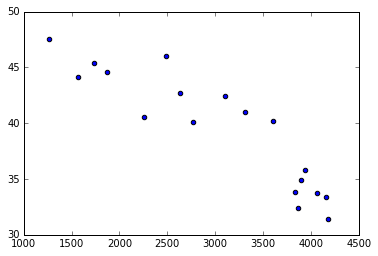

In [36]:
plt.scatter(df_csv['prison'], df_csv['gun']) #Armas por prisões

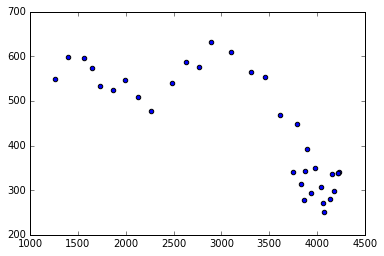

In [37]:
plt.scatter(df_csv['prison'], df_csv['robbery']) #População prisional por roubos

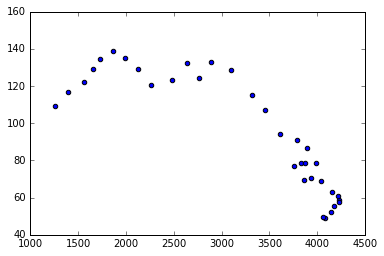

In [38]:
plt.scatter(df_csv['prison'], df_csv['rape']) #População prisional por Estupros

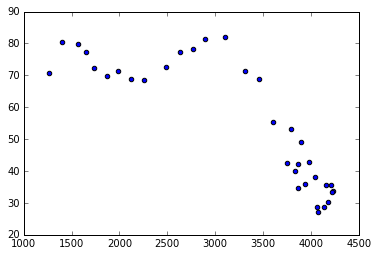

In [39]:
plt.scatter(df_csv['prison'], df_csv['murder']) #População prisional  por assassinatos

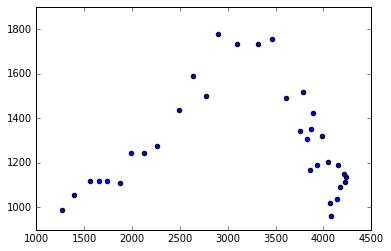

In [40]:
plt.scatter(df_csv['prison'], df_csv['assault']) #População prisional por assaltos

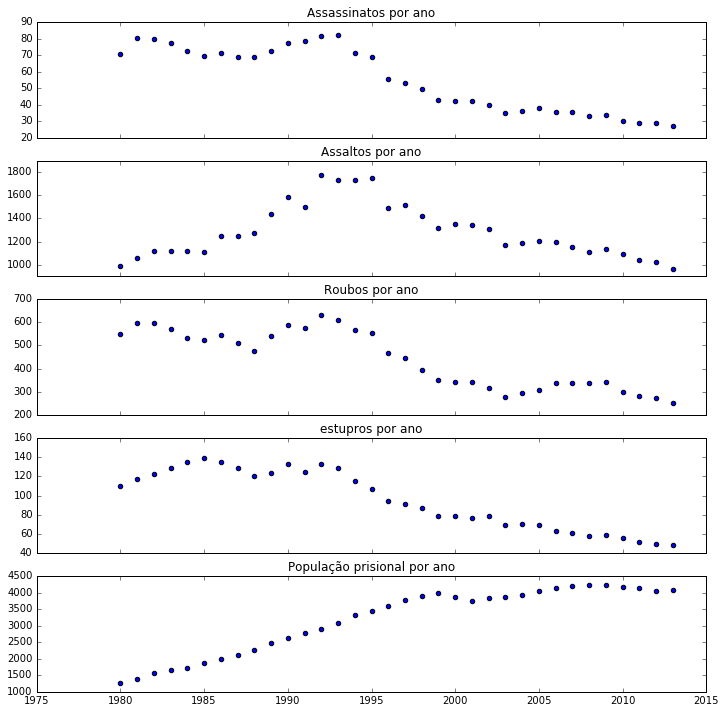

In [5]:
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(12,12), sharex=True, sharey=False)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
ax[0].scatter(df_csv['year'], df_csv['murder'])
ax[0].set_title('Assassinatos por ano')
ax[1].scatter(df_csv['year'], df_csv['assault'])
ax[1].set_title('Assaltos por ano')
ax[2].scatter(df_csv['year'],df_csv['robbery'])
ax[2].set_title('Roubos por ano')
ax[3].scatter(df_csv['year'], df_csv['rape'])
ax[3].set_title('estupros por ano')
ax[4].scatter(df_csv['year'], df_csv['prison'])
ax[4].set_title('População prisional por ano')
#f.subplots_adjust(hspace=0)
plt.show()

Observamos que a população prisional e o número de assaltos crescem juntos até cerca de 1995. Entretanto, após os anos 2000, enquanto todos os indices criminais apresentam tendencia de queda, a população prisional permanece aprox. constante

## Dados populacionais:

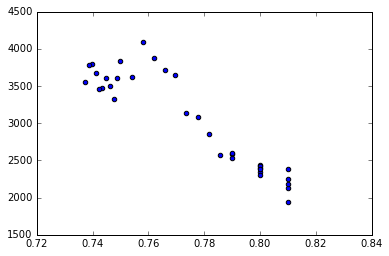

In [15]:
plt.scatter(df_csv['metpct'],df_csv['majorcrime'])

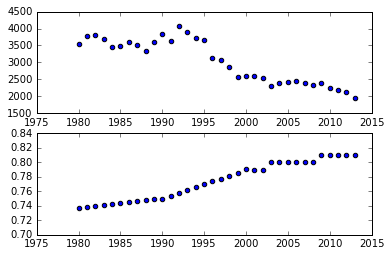

In [22]:
plt.subplot(2, 1, 1)
plt.scatter(df_csv['year'], df_csv['majorcrime'])


plt.subplot(2, 1, 2)
plt.scatter(df_csv['year'], df_csv['metpct'])


plt.show()

Podemos observar uma correlação negativa entre população urbana e crimes totais.

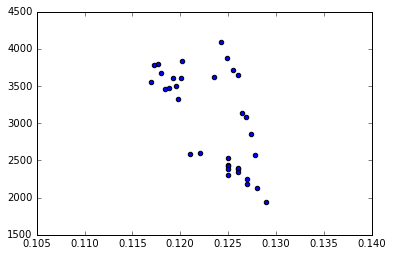

In [17]:
plt.scatter(df_csv['ampct'],df_csv['majorcrime'])

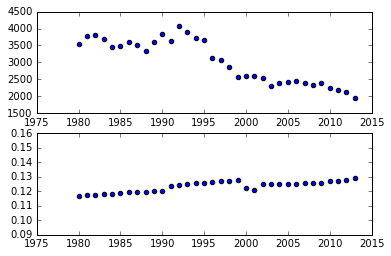

In [18]:
plt.subplot(2, 1, 1)
plt.scatter(df_csv['year'], df_csv['majorcrime'])
plt.set_title('Total de crimes por ano')

plt.subplot(2, 1, 2)
plt.scatter(df_csv['year'], df_csv['ampct'])


plt.show()

Analisando as séries temporais, observamos que o percentual de população negra apresenta um leve aumento, enquanto o total de crimes apresenta uma tendencia de queda.

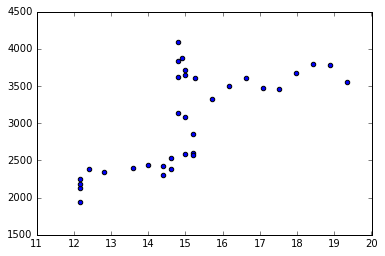

In [19]:
plt.scatter(df_csv['r1524'],df_csv['majorcrime'])

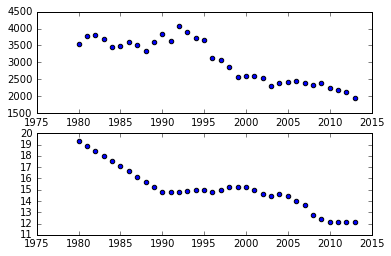

In [20]:
plt.subplot(2, 1, 1)
plt.scatter(df_csv['year'], df_csv['majorcrime'])

plt.subplot(2, 1, 2)
plt.scatter(df_csv['year'], df_csv['r1524'])


plt.show()

Observamos que o percentual de população entre 15 e 24 anos tem correlação positiva com o total de crimes, observando o gráfico entre as duas e as séries temporais, que decrescem juntas.